# ****Import data****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")


df = pd.read_csv("/kaggle/input/cafe-sales-dirty-data-for-cleaning-training/dirty_cafe_sales.csv")

In [2]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [3]:
df.tail()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02
9999,TXN_6170729,Sandwich,3,4.0,12.0,Cash,In-store,2023-11-07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [5]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [6]:
df.shape

(10000, 8)

In [7]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [8]:
df.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

In [9]:
df.sample(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
8573,TXN_4563544,Sandwich,5,4.0,20.0,NaN,ERROR,2023-06-10
3123,TXN_4226287,Cookie,1,1.0,1.0,NaN,NaN,2023-04-29
5139,TXN_7426387,Smoothie,5,4.0,20.0,Cash,NaN,2023-10-30
3900,TXN_5093855,NaN,4,ERROR,6.0,Cash,Takeaway,2023-11-23
6963,TXN_1670848,Cake,2,ERROR,6.0,Credit Card,ERROR,2023-08-04
4114,TXN_7887682,UNKNOWN,2,2.0,4.0,Credit Card,Takeaway,2023-06-17
1249,TXN_3572190,Coffee,5,2.0,10.0,Credit Card,Takeaway,2023-03-05
9669,TXN_8877714,Juice,5,3.0,15.0,NaN,NaN,2023-03-28
2744,TXN_9773606,Tea,2,1.5,3.0,Cash,Takeaway,2023-12-04
1018,TXN_3380698,Coffee,3,2.0,6.0,Credit Card,Takeaway,2023-12-15


In [10]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [11]:
df[['Item', 'Payment Method', 'Location']] = df[['Item', 'Payment Method', 'Location']].fillna('NONE')

In [12]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')

df[['Quantity', 'Price Per Unit']] = df[['Quantity', 'Price Per Unit']].fillna(df[['Quantity', 'Price Per Unit']].mean())

In [13]:
df.isnull().sum()

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent         173
Payment Method        0
Location              0
Transaction Date    159
dtype: int64

In [14]:
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', 'NONE', 'ERROR', 'Juice', 'Tea'], dtype=object)

In [15]:
df['Item'] = df['Item'].replace('NONE', 'UNKNOWN')

In [16]:
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', 'ERROR', 'Juice', 'Tea'], dtype=object)

In [17]:
count_error = df['Item'].str.count('ERROR').sum()
print(count_error)

292


In [18]:
df[df['Item'] == 'ERROR'].head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
14,TXN_8915701,ERROR,2.0,1.500000,3.0,NONE,In-store,2023-03-21
69,TXN_8471743,ERROR,5.0,3.000000,15.0,Digital Wallet,In-store,2023-04-06
88,TXN_9487821,ERROR,1.0,5.000000,5.0,Digital Wallet,Takeaway,2023-05-24
118,TXN_4633784,ERROR,5.0,2.949984,15.0,NONE,In-store,2023-02-06
211,TXN_6717827,ERROR,3.0,5.000000,15.0,Digital Wallet,NONE,2023-11-15


In [19]:
df['Item'] = df['Item'].replace('ERROR','UNKNOWN')

In [20]:
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', 'Juice', 'Tea'], dtype=object)

In [21]:
df['Payment Method'].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', 'ERROR',
       'NONE'], dtype=object)

In [22]:
df['Location'].unique()

array(['Takeaway', 'In-store', 'UNKNOWN', 'NONE', 'ERROR'], dtype=object)

In [23]:
unwanted_data = df[df['Payment Method'].isin(['UNKNOWN', 'NONE', 'ERROR'])].index

# Drop the unwanted rows
df = df.drop(unwanted_data)


unwanted_data_1 = df[df['Location'].isin(['UNKNOWN', 'NONE', 'ERROR'])].index

# Drop the unwanted rows
df = df.drop(unwanted_data_1)

unwanted_data_2 = df[df['Item'].isin(['UNKNOWN', 'NONE', 'ERROR'])].index

# Drop the unwanted rows
df = df.drop(unwanted_data_2)




In [24]:
df['Payment Method'].unique()

array(['Credit Card', 'Cash', 'Digital Wallet'], dtype=object)

In [25]:
df['Location'].unique()

array(['Takeaway', 'In-store'], dtype=object)

In [26]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df.dropna(subset=['Transaction Date'], inplace=True)

df["day"] = df.loc[:, 'Transaction Date'].dt.day
df["month"] = df.loc[:, 'Transaction Date'].dt.month
df["year"] = df.loc[:, 'Transaction Date'].dt.year

In [27]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,day,month,year
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,8,9,2023
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,16,5,2023
2,TXN_4271903,Cookie,4.0,1.0,ERROR,Credit Card,In-store,2023-07-19,19,7,2023
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,11,6,2023
10,TXN_2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07,7,11,2023


In [28]:
df.dtypes

Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                 object
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
day                          int32
month                        int32
year                         int32
dtype: object

# **Item based salses**

In [29]:
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

Total_sales_by_item = df.groupby(df['Item'])[['Total Spent']].sum().reset_index()
Total_sales_by_item = Total_sales_by_item.sort_values(by="Total Spent",ascending=False)
Total_sales_by_item

,Item,Total Spent
4,Salad,7015.0
5,Sandwich,5428.0
6,Smoothie,4472.0
3,Juice,4041.0
0,Cake,3927.0
1,Coffee,2514.0
7,Tea,1906.5
2,Cookie,1296.0


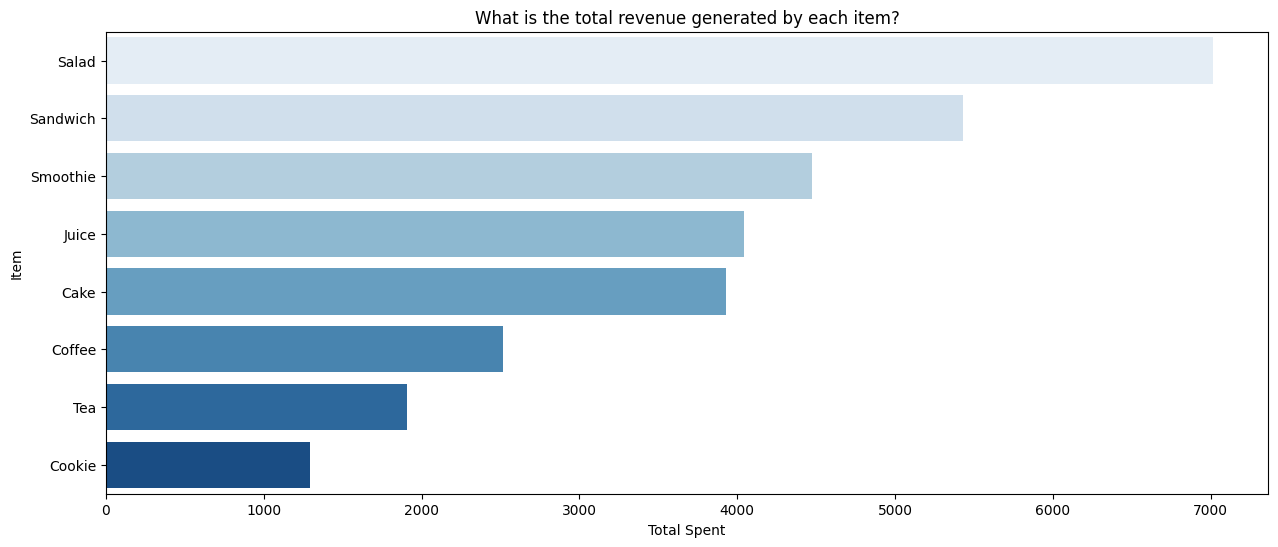

In [30]:
# Horizontal Bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x='Total Spent', y='Item', data=Total_sales_by_item, palette='Blues')
plt.title('What is the total revenue generated by each item?')
plt.xlabel('Total Spent')
plt.ylabel('Item')
plt.show()


In [31]:
most_orderd_item = df.groupby('Item')[['Quantity']].sum().round().reset_index()
most_orderd_item = most_orderd_item.sort_values(by="Quantity",ascending=False)
most_orderd_item

,Item,Quantity
4,Salad,1457.0
5,Sandwich,1432.0
3,Juice,1407.0
2,Cookie,1382.0
0,Cake,1361.0
7,Tea,1331.0
1,Coffee,1298.0
6,Smoothie,1200.0


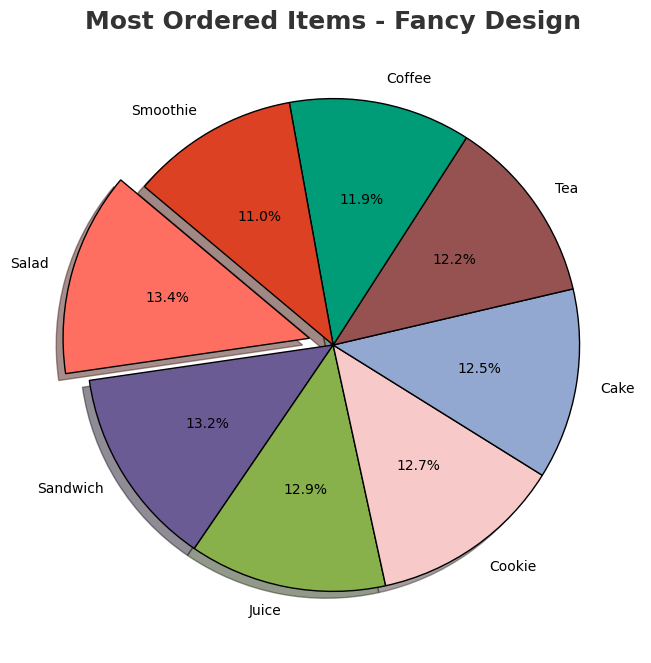

In [32]:
# Set figure size
plt.figure(figsize=(10, 8))

# 🎨 Custom Fancy Color Palette (looks beautiful and professional)
colors = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#955251", "#009B77", "#DD4124", "#D65076", "#45B8AC"]

# Set explode for largest slice (to highlight highest Quantity)
explode = [0.1 if x == most_orderd_item['Quantity'].max() else 0 for x in most_orderd_item['Quantity']]

# Create Pie Chart
plt.pie(
    most_orderd_item['Quantity'],
    labels=most_orderd_item['Item'],
    autopct='%1.1f%%',
    colors=colors[:len(most_orderd_item)],  # pick only needed colors
    explode=explode,
    startangle=140,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

# Add a nice title
plt.title('Most Ordered Items - Fancy Design', fontsize=18, fontweight='bold', color='#333333')

# Display the plot
plt.show()

# Highest sales volume by day of the week

In [33]:
df["month_name"] = df['Transaction Date'].dt.month_name()
df["day_name"] = df['Transaction Date'].dt.day_name()


sales_by_day = df.groupby(df['day_name'])['Total Spent'].sum().round(1).reset_index()
sales_by_day = sales_by_day.sort_values(by="Total Spent",ascending=False)
sales_by_day

,day_name,Total Spent
4,Thursday,4651.0
3,Sunday,4564.0
1,Monday,4527.5
5,Tuesday,4357.5
0,Friday,4278.5
2,Saturday,4252.0
6,Wednesday,3969.0


# Thank you!